In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Dataset review

In [166]:
df = pd.read_csv(r'C:\Users\maria.olivares\Documents\Pytho 2 final assig\Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')

In [167]:
df

Review  Liked
0    "I also had to taste my Mom's multi-grain pump...      1
1            "I'd rather eat airline food, seriously."      0
2        Cant say enough good things about this place.      1
3                         The ambiance was incredible.      1
4            The waitress and manager are so friendly.      1
..                                                 ...    ...
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

[500 rows x 2 columns]

In [110]:
df.shape

(500, 2)

As we can see the data contains a reviw from the clients and a like or dislike for the restobar 

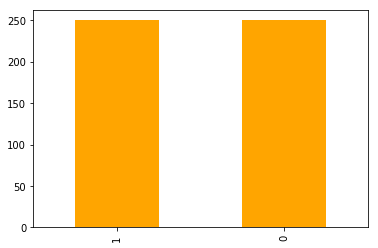

In [37]:
liked = df.Liked.value_counts()
liked.plot(kind="bar",color='orange')

In [30]:
liked

1    250
0    250
Name: Liked, dtype: int64

The proportion of like and dislike is 50% each. Now we need to analyze the reviews to build a model that can classify the new reviews. Furthermore it could be useful to know which characteristics of the restobar are liked and disliked. For this now we star analyzing the text contain in the reviews.

In [52]:
#Cheking missing data
100*df.isnull().sum()/df.isnull().count()

Review    0.0
Liked     0.0
dtype: float64

We don't have missing data.

Now using textblob we analize the words and their frequency

In [116]:
from textblob import TextBlob

review = TextBlob(str(df.loc[:,'Review']))

In [117]:
tokens = [t for t in review.split()]
freq = nltk.FreqDist(tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

0:1
"I:1
also:2
had:1
to:1
taste:1
my:3
Mom's:1
multi-grain:1
pump...:1
1:1
"I'd:1
rather:1
eat:1
airline:1
food,:1
seriously.":1
2:1
Cant:1
say:1
enough:1
good:2
things:1
about:1
this:1
place.:1
3:1
The:3
ambiance:1
was:3
incredible.:1
4:1
waitress:1
and:3
manager:1
are:2
so:1
friendly.:1
...:3
495:1
"Worse:1
of:1
all,:1
he:1
humiliated:1
his:1
worker:1
right:1
496:1
CONCLUSION::1
Very:1
filling:1
meals.:1
497:1
Their:1
daily:1
specials:1
always:1
a:1
hit:1
with:1
498:1
pancake:1
really:1
pretty:1
la...:1
499:1
"This:1
first:1
crawfish:1
experience,:1
it...:1
Name::1
Review,:1
Length::1
500,:1
dtype::1
object:1


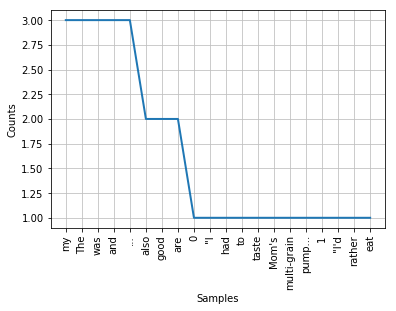

In [118]:
freq.plot(20, cumulative=False)

### Data pre-procesing 

In [120]:
#spelling correction 
review.correct()

TextBlob("0      "I also had to taste my Tom's multi-grain pump...
1              "I'd rather eat airline food, seriously."
2          Want say enough good things about this place.
3                           The alliance was incredible.
4              The witness and manager are so friendly.
                             ...                        
495    "Horse of all, he humiliated his worker right ...
496                      CONCLUSION: Very filling meals.
497    Their daily special are always a hit with my ...
498    The pancake was also really good and pretty la...
499    "His was my first crawfish experience, and it...
Same: Review, Length: 500, type: object")

In [161]:
len(review.words)

90

### Main objective

For this case the main objective is to get a good model to classify the obtained reviews, so it can be a reliable to automatize this part of the process. From the reviews, we also want to know why people is liking or not liking the restobar. For this we want to extract the important words or phrases about the group that like the restobar and the ones that not. his could tell the restobar's owner which characteristics are good for the people and the ones that need to be improve.


#### Analizing the common words in the liked reviews and the disliked reviews

In [124]:
#Separate the dataframe between the liked and not liked
df_liked=df[df['Liked']==1]
df_not_liked=df[df['Liked']==0]

In [148]:
#Create a Textblob with the liked reviews
likeds = TextBlob(str(df_liked.loc[:,'Review']))
#Eliminating the stop words of the data
filtered_words = [word for word in likeds.words if word not in stopwords.words('english')]
len(filtered_words)

69

In [156]:
#Getting the new frequency of the words
freq = nltk.FreqDist(filtered_words)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

1:1
I:5
'd:1
rather:1
eat:1
airline:1
food:2
seriously:1
5:1
would:1
recommend:1
place:1
6:1
Overall:1
n't:1
impressed:1
Noca:1
7:1
My:1
gyro:1
basically:1
lettuce:1
8:1
Terrible:1
service:1
485:1
Seafood:1
limited:1
boiled:1
shrimp:1
crab:1
486:1
The:1
selection:1
best:1
490:1
dont:1
think:1
back:1
long:1
time:1
491:1
It:1
attached:1
gas:1
station:1
495:1
Worse:1
humiliated:1
worker:1
right:1
Name:1
Review:1
Length:1
250:1
dtype:1
object:1


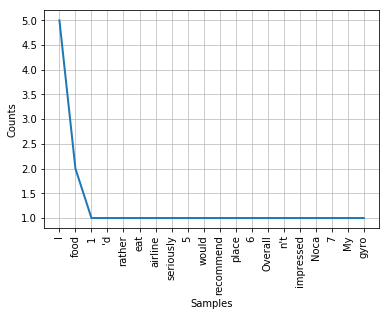

In [157]:
freq.plot(20, cumulative=False)

From this we can see that some hints of what are the things about the restobar that the people like. It woulb be better to analize phrases or tuplas of the words so we can get more information about the context of the word. After some research online, it could only be obtain the results for the words, but with more time to focus on this part, we can find more complete results.

Now we do the same for the dislike comments

In [158]:
#Create a Textblob with the liked reviews
not_liked = TextBlob(str(df_not_liked.loc[:,'Review']))
#Eliminating the stop words of the data
filtered_words2 = [word for word in not_liked.words if word not in stopwords.words('english')]
len(filtered_words2)

62

In [159]:
#Getting the new frequency of the words
freq2 = nltk.FreqDist(filtered_words2)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

1:1
I:5
'd:1
rather:1
eat:1
airline:1
food:2
seriously:1
5:1
would:1
recommend:1
place:1
6:1
Overall:1
n't:1
impressed:1
Noca:1
7:1
My:1
gyro:1
basically:1
lettuce:1
8:1
Terrible:1
service:1
485:1
Seafood:1
limited:1
boiled:1
shrimp:1
crab:1
486:1
The:1
selection:1
best:1
490:1
dont:1
think:1
back:1
long:1
time:1
491:1
It:1
attached:1
gas:1
station:1
495:1
Worse:1
humiliated:1
worker:1
right:1
Name:1
Review:1
Length:1
250:1
dtype:1
object:1


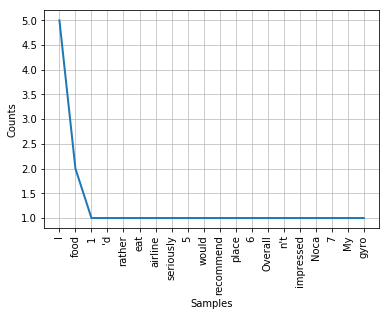

In [160]:
 freq2.plot(20, cumulative=False)

From this we can also have some idea of what people didn't like, but again we need to analize the words more in context

### Build the predictor model

To get the prediction fot the reviews we use the spacy library to conect put the text analysis into the prediction model

In [50]:
!pip install spacy
!pip install spacy-lookups-data
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

  Running setup.py bdist_wheel for spacy-lookups-data: started
  Running setup.py bdist_wheel for spacy-lookups-data: finished with status 'done'
  Stored in directory: C:\Users\maria.olivares\AppData\Local\pip\Cache\wheels\79\a4\b8\6085d282396938b29675292697e72871b145990d0079ceadc1
Successfully built spacy-lookups-data
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Running setup.py install for es-core-news-sm: started
    Running setup.py install for es-core-news-sm: finished with status 'done'
[+] Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [99]:
import spacy

In [102]:
import es_core_news_sm as nlp
import re

First we need to clean the data to remove noise for the model.

In [103]:
# Cleaning the texts

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [162]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization
# In this case we don't have a long list of words, so we set the max_features in 100 
cv = CountVectorizer(max_features = 100) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = df.iloc[:, 1].values #Defining our response variable

In [164]:
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
#Needed libraries
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\maria.olivares\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


To compare different predictor models we will use the logistic regression, because we have a binary output, and the Naive Bayes that usually behave good with this kind of output and the Random forest model that also fits well with the output. 

In [163]:
#Importing the test dataset
df_test=pd.read_csv(r'Y:\Reference Material\Module 2\Python\Final Asignment\IMDB Dataset EVS.csv')

In [170]:
#Inicilizating the train and test variables 
X_test=df_test['review']
Y_test=df_test['sentiment']
Y_train = df.iloc[:, 1].values #Defining our response variable

In [181]:
#Replazing the sentiment values to 1 and 0
Y_test1=Y_test.replace('positive',1)
Y_test2=Y_test1.replace('negative',0)

In [190]:
corpus2 = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review2 = re.sub('[^a-zA-Z]', ' ', df_test['review'][i]) #Removes all but letters (and Capitals)
    review2 = review2.lower() #Put all the letters in lowercase
    review2 = review2.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review2 = [ps.stem(word) for word in review2 if not word in set(stopwords.words('english'))]
    review2 = ' '.join(review2) #For reversing the process (list -> string)
    corpus2.append(review2) #Generate a list of one string per observation

In [191]:
X_test

0      One of the other reviewers has mentioned that ...
1      A wonderful little production. <br /><br />The...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
4      Petter Mattei's "Love in the Time of Money" is...
                             ...                        
495    "American Nightmare" is officially tied, in my...
496    First off, I have to say that I loved the book...
497    This movie was extremely boring. I only laughe...
498    I was disgusted by this movie. No it wasn't be...
499    Such a joyous world has been created for us in...
Name: review, Length: 500, dtype: object

In [202]:
cv = CountVectorizer(max_features = 100) #Keepong the 1000 more frequent words

X_test = cv.fit_transform(corpus2).toarray() #Creation of the Sparsematrix



500

In [197]:


# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X, Y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X, Y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Import the model we are using Random Forest model
from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
#train the model
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X,Y_train)
# Use the forest's predict method on the test data
rf_y_pred=classifier.predict(X_test)# Calculate the absolute errors

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(Y_test2, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(Y_test2, lr_y_pred)
print(lr_cm)
rf_cm = confusion_matrix(Y_test2, rf_y_pred)
print(lr_cm)

[[ 82 181]
 [ 92 145]]
[[ 37 226]
 [ 30 207]]
[[ 37 226]
 [ 30 207]]


No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.461
Logistic: ROC AUC=0.491
Random Forest: ROC AUC=0.504


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold       tpr       fpr
0    2.000000e+00  0.000000  0.000000
1    1.000000e+00  0.611814  0.688213
2    4.057645e-01  0.616034  0.688213
3    5.000802e-25  0.616034  0.699620
4    2.541520e-43  0.628692  0.699620
5    1.377262e-45  0.628692  0.703422
6    3.470894e-60  0.637131  0.703422
7    1.464154e-75  0.637131  0.707224
8    3.485601e-88  0.641350  0.707224
9    1.958834e-91  0.641350  0.711027
10   4.685205e-94  0.645570  0.711027
11  1.301483e-101  0.645570  0.714829
12  1.271793e-105  0.649789  0.714829
13  2.487437e-141  0.649789  0.730038
14  1.274729e-179  0.658228  0.730038
15  1.293021e-189  0.658228  0.733840
16  1.361189e-290  0.666667  0.733840
17  8.671346e-320  0.666667  0.737643
18   0.000000e+00  1.000000  1.000000

threshold       tpr       fpr
0     2.000000  0.000000  0.000000
1     1.000000  0.012658  0.026616
2     1.000000  0.016878  0.026616
3     1.000000  0.021097  0.030418
4     1.000000  0.025316  0.030418
..         ...       ...       ...
227   0.080225  0.974684  0.954373
228   0.037135  0.995781  0.954373
229   0.017787  0.995781  0.984791
230   0.013188  1.000000  0.984791
231   0.005955  1.000000  1.000000

[232 rows x 3 columns]

threshold       tpr       fpr
0    2.000000  0.000000  0.000000
1    1.000000  0.037975  0.045627
2    0.900000  0.118143  0.152091
3    0.870000  0.126582  0.152091
4    0.850000  0.130802  0.155894
5    0.800000  0.295359  0.342205
6    0.771429  0.295359  0.349810
7    0.750000  0.299578  0.349810
8    0.740000  0.299578  0.353612
9    0.700000  0.476793  0.482890
10   0.655556  0.476793  0.486692
11   0.650000  0.481013  0.486692
12   0.628571  0.481013  0.494297
13   0.600000  0.654008  0.615970
14   0.555556  0.662447  0.615970
15   0.550000  0.670886  0.615970
16   0.500000  0.822785  0.752852
17   0.496984  0.822785  0.756654
18   0.471429  0.827004  0.756654
19   0.402439  0.827004  0.764259
20   0.400000  0.886076  0.855513
21   0.350000  0.890295  0.859316
22   0.326984  0.890295  0.863118
23   0.325000  0.894515  0.863118
24   0.300000  0.962025  0.950570
25   0.200000  0.983122  0.980989
26   0.171429  0.983122  0.984791
27   0.100000  0.995781  0.996198
28   0.000000  1.000000  1.000000

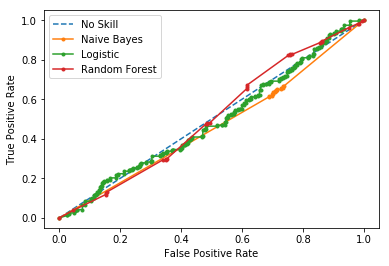

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.6160337552742616
NB Specificity: 0.30038022813688214
RF Sensitivity: 0.9957805907172996
RF Specificity: 0.0038022813688213253
LR Sensitivity: 0.9113924050632911
LR Specificity: 0.12167300380228141
NB Sensitivity: 0.6160337552742616
NB Specificity: 0.311787072243346
RF Sensitivity: 0.8860759493670886
RF Specificity: 0.14448669201520914
LR Sensitivity: 0.8649789029535865
LR Specificity: 0.14068441064638781
NB Sensitivity: 0.6118143459915611
NB Specificity: 0.311787072243346
RF Sensitivity: 0.6708860759493671
RF Specificity: 0.3840304182509505
LR Sensitivity: 0.810126582278481
LR Specificity: 0.20152091254752846
NB Sensitivity: 0.6118143459915611
NB Specificity: 0.311787072243346
RF Sensitivity: 0.29535864978902954
RF Specificity: 0.6501901140684411


In [210]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)
rf_probs = classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(Y_test2))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test2, ns_probs)
nb_auc = roc_auc_score(Y_test2, nb_probs)
lr_auc = roc_auc_score(Y_test2, lr_probs)
rf_auc = roc_auc_score(Y_test2, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(Y_test2, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(Y_test2, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(Y_test2, lr_probs)
rf_fpr, rf_tpr, rf_thresholds  = roc_curve(Y_test2, rf_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

rf_df = pd.DataFrame(data=[])
rf_df['threshold'] = rf_thresholds
rf_df['tpr'] = rf_tpr
rf_df['fpr'] = rf_fpr
display(rf_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax1.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])
    
def evaluate_threshold_rf(threshold):
    print('RF Sensitivity:', rf_tpr[rf_thresholds > threshold][-1])
    print('RF Specificity:', 1 - rf_fpr[rf_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)
evaluate_threshold_rf(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)
evaluate_threshold_rf(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)
evaluate_threshold_rf(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)
evaluate_threshold_rf(0.75)

 From the analysis of the graphics of the ROC curve we can see that the models are not a good predicto, because the naive bayes and the logistic model are below the no skill and the random forest behave a little better but non of this model are a good predictor for the output. Given the time we can not analize the models to see if the accurracy can improve, but what we can do is analize the confusion matrix to see which model is behaving better according to our main interest.
  
  In this case is important to us a good accuracy in both scenarios, because from both we can extract information about the things that we should encourage and the ones that we need to improve. The restobar is new, so if we have to choose which prediction is more important, we can choose the negatives ones, because if we are new, is really important to not create a bad image for the clients, this because it would be hard to get them back without the timing to get loyalty from them. For this, we will focus on analyze the true negatives, meaning the specificity of the model. For this we can see that according to this, the specificity of the random forest with a threshold of 0.5 is behaving better than the other ones.
  
 The main recomendation for the restobar owner would be, to check the frequent qords fot the positive and negative reviews to make changes to the restobar and use the random forest model to predict the reviews.
 
 All of this can be a lot improve analyzing better the text and the inputs for the model.
